In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
aaa=cv2.imread("SOCOFing\\Real\\101__M_left_ring_finger.BMP")
a = cv2.cvtColor(aaa, cv2.COLOR_BGR2GRAY)
print(a.shape)
x = 0
y = 0
width = 50
height = 50

# Cắt ảnh
crop_img = a[y:y+height, x:x+width]

# Hiển thị ảnh
cv2.imshow('Original Image', a)
cv2.imshow('Cropped Image', crop_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(103, 96)


(array([[[  0,   0]],

       [[  0, 102]],

       [[ 95, 102]],

       [[ 95,   0]]], dtype=int32),)
0   0   96   103


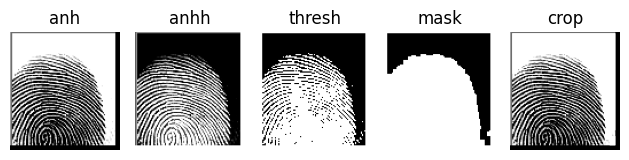

In [4]:


gray = a

# invert gray image
gray = 255 - gray

# threshold
thresh = cv2.threshold(gray,20,255,cv2.THRESH_BINARY)[1]

# apply close and open morphology to fill tiny black and white holes and save as mask
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# get contours (presumably just one around the nonzero pixels) 
contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
cntr = contours[0]
print(contours)
x,y,w,h = cv2.boundingRect(cntr)
print(x, " ", y," ", w, " ", h)
# make background transparent by placing the mask into the alpha channel
new_img = cv2.cvtColor(a, cv2.COLOR_BGR2BGRA)
new_img[:, :, 3] = mask

# then crop it to bounding rectangle
crop = new_img[y:y+h, x:x+w]

plt.subplot(1, 5, 1)
plt.imshow(a, cmap="gray")
plt.title("anh") 
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(gray, cmap="gray")
plt.title("anhh") 
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(thresh, cmap="gray")
plt.title("thresh") 
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(mask, cmap="gray")
plt.title("mask") 
plt.axis("off")  

plt.subplot(1, 5, 5)
plt.imshow(new_img, cmap="gray")
plt.title("crop") 
plt.axis("off")

plt.tight_layout()
plt.show(block=True)